# Analyse du DataSet

In [1]:
import os
import csv

path = 'StressLevelDataset.csv'

if os.path.exists(path):
    with open(path, 'r') as fichier_csv:
        lecteur_csv = csv.reader(fichier_csv)
        for ligne in lecteur_csv:
            print(ligne)
        
else:
    print(f"Le fichier {path} n'existe pas.")


['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']
['14', '20', '0', '11', '2', '1', '2', '4', '2', '3', '3', '2', '3', '2', '3', '3', '2', '3', '3', '2', '1']
['15', '8', '1', '15', '5', '3', '1', '4', '3', '1', '2', '2', '1', '4', '1', '5', '1', '4', '5', '5', '2']
['12', '18', '1', '14', '2', '1', '2', '2', '2', '2', '3', '2', '2', '3', '3', '2', '2', '3', '2', '2', '1']
['16', '12', '1', '15', '4', '3', '1', '3', '4', '2', '2', '2', '2', '4', '1', '4', '1', '4', '4', '5', '2']
['16', '28', '0', '7', '2', '3', '5', '1', '3', '2', '4', '3', '4', '3', '1', '2', '1', '5', '0', '5', '1']
['20', '13', '1', '21', '3', '3', '1', '4', '3', '2', '2', '1', '2'

In [2]:
#autre methode ouverture fichier
import pandas as pd
df= pd.read_csv('StressLevelDataset.csv')

In [3]:
import pandas as pd
path = 'StressLevelDataset.csv'

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(path)

# Faire une copie du DataFrame
df_copie = df.copy()

# Afficher le nombre de lignes dans la copie du DataFrame
nombre_de_lignes_copie = len(df_copie)
print(f"La copie du DataFrame contient {nombre_de_lignes_copie} lignes.")

La copie du DataFrame contient 1100 lignes.


In [4]:
# Afficher les valeurs uniques de chaque colonne dans l'ordre croissant
for colonne in df.columns:
    valeurs_uniques = df_copie[colonne].unique()
    valeurs_uniques = sorted(valeurs_uniques)  # Tri des valeurs uniques
    print(f"Valeurs uniques pour la colonne {colonne} :")
    print(valeurs_uniques)
    print("\n")

Valeurs uniques pour la colonne anxiety_level :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


Valeurs uniques pour la colonne self_esteem :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


Valeurs uniques pour la colonne mental_health_history :
[0, 1]


Valeurs uniques pour la colonne depression :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


Valeurs uniques pour la colonne headache :
[0, 1, 2, 3, 4, 5]


Valeurs uniques pour la colonne blood_pressure :
[1, 2, 3]


Valeurs uniques pour la colonne sleep_quality :
[0, 1, 2, 3, 4, 5]


Valeurs uniques pour la colonne breathing_problem :
[0, 1, 2, 3, 4, 5]


Valeurs uniques pour la colonne noise_level :
[0, 1, 2, 3, 4, 5]


Valeurs uniques pour la colonne living_conditions :
[0, 1, 2, 3, 4, 5]


Valeurs uniques pour la colonne safety :
[0, 1, 2, 3, 4, 5]


Valeurs uniques pour la 

In [5]:
#le nombre total de colonnes
nombre_total_colonnes = df_copie.shape[1]

print(f"Nombre total de colonnes : {nombre_total_colonnes}")

Nombre total de colonnes : 21


# Application du modèle K-means

### Importation des bibliothèques nécessaires

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Création d'un DataFrame

In [7]:
df = pd.read_csv(path)

#copie du DataFrame
df_copie = df.copy()

### Normalisation des données

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copie)

### Le nombre optimal de clusters (K) 

#### Methode du scrore de la silhouette

Le coefficient de silhouette mesure à quel point chaque point de données dans un cluster est similaire aux autres points du même cluster par rapport aux points des autres clusters. Il varie de -1 à 1, où une valeur élevée indique que l'objet est bien assorti à son propre cluster et mal assorti aux clusters voisins.

Nombre optimal de clusters selon le score de silhouette : 5


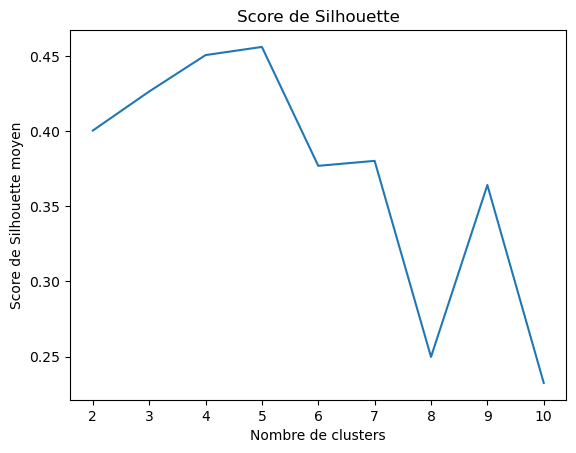

In [9]:
from sklearn.metrics import silhouette_score

# Liste pour stocker les scores de silhouette
silhouette_scores = []

# On peut essayer différents nombres de clusters
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Calcul du score de la silhouette
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Le nombre optimal de clusters avec le score de silhouette le plus élevé
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 car le range commence à 2
print(f"Nombre optimal de clusters selon le score de silhouette : {optimal_clusters}")

# Graphique du score de silhouette
plt.plot(range(2, 11), silhouette_scores)
plt.title('Score de Silhouette')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de Silhouette moyen')
plt.show()


Le score le plus élevé est celui qui correspont au 5 clusters, donc on prend 5 comme nombre optimal pour les clusters

### Appliquation du modèle K-Means 

In [10]:
k = 5  
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_copie['cluster'] = kmeans.fit_predict(scaled_data)

### Analyse des résultats

Exploration des clusters formés et analyse des caractéristiques de chaque cluster. Ce script nous donnera la moyenne des valeurs pour chaque colonne dans chaque cluster.

In [11]:
cluster_summary = df_copie.groupby('cluster').mean()
print(cluster_summary)

         anxiety_level  self_esteem  mental_health_history  depression  \
cluster                                                                  
0            10.933333    14.447619               0.380952   11.314286   
1            11.410000    19.980000               0.513333   11.640000   
2            17.980392     7.852941               1.000000   21.352941   
3             4.182724    27.438538               0.000000    4.172757   
4             9.522727    15.704545               0.477273   15.238636   

         headache  blood_pressure  sleep_quality  breathing_problem  \
cluster                                                               
0        2.438095        3.000000       2.752381           2.876190   
1        2.483333        1.000000       2.456667           3.026667   
2        3.944444        3.000000       0.996732           3.944444   
3        1.000000        2.003322       4.488372           1.514950   
4        2.840909        3.000000       2.772727       

### Visualisation des résultats

Visualiser les résultats en réduisant les dimensions des données et en les projetant sur un graphique.

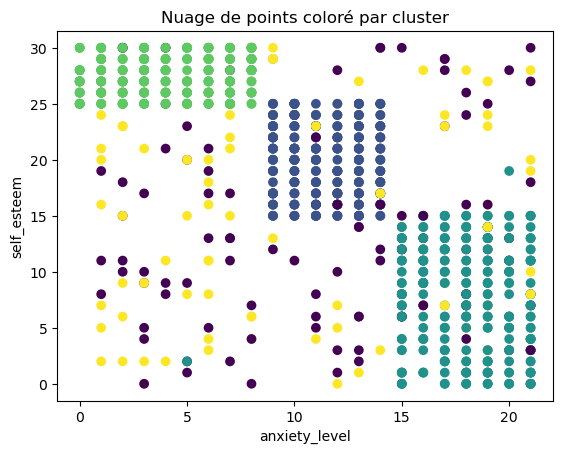

In [12]:
import matplotlib.pyplot as plt

# Choisissez deux colonnes pour les axes x et y
x_column = 'anxiety_level'
y_column = 'self_esteem'

# Affichez le nuage de points coloré par cluster
plt.scatter(df_copie[x_column], df_copie[y_column], c=df_copie['cluster'], cmap='viridis')
plt.title('Nuage de points coloré par cluster')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()


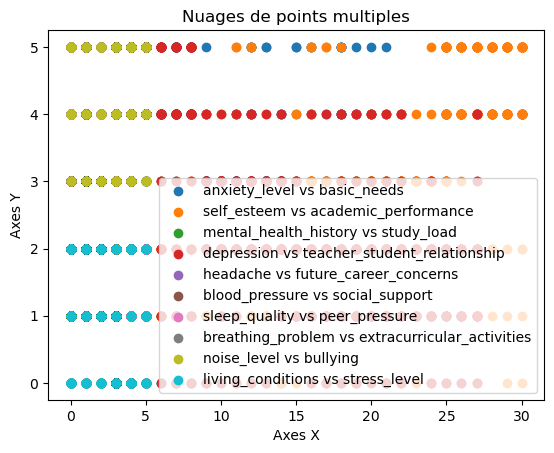

In [13]:
import matplotlib.pyplot as plt

# Choisissez plusieurs colonnes pour les axes x et y
x_columns = ['anxiety_level', 'self_esteem', 'mental_health_history','depression', 'headache', 'blood_pressure',
             'sleep_quality','breathing_problem','noise_level','living_conditions','safety']
y_columns = ['basic_needs','academic_performance', 'study_load', 'teacher_student_relationship','future_career_concerns',
             'social_support','peer_pressure','extracurricular_activities','bullying','stress_level',]

# Créez un nuage de points pour chaque paire d'axes
for x_col, y_col in zip(x_columns, y_columns):
    plt.scatter(df_copie[x_col], df_copie[y_col], label=f'{x_col} vs {y_col}')

# Ajoutez des étiquettes et une légende
plt.title('Nuages de points multiples')
plt.xlabel('Axes X')
plt.ylabel('Axes Y')
plt.legend()
plt.show()

### Réduction de la dimension avec la methode PCA

Visualiser la répartition de chaque observation (ligne) dans l'espace à 21 dimensions avec des couleurs représentant les clusters, on va utiliser la technique de réduction de dimension PCA pour projeter les données dans un espace 2D ou 3D. Cela facilitera la visualisation tout en essayant de conserver autant d'informations que possible.

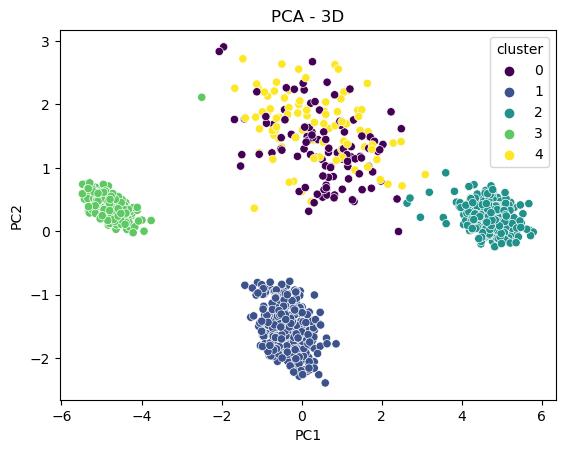

In [14]:
from sklearn.decomposition import PCA
import seaborn as sns

# Choisir le nombre de composantes pour le PCA(2D ou 3D)
n_components = 3

# Appliquer le PCA
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)

# Créer un DataFrame avec les composantes principales
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df['cluster'] = df_copie['cluster']

# Utiliser seaborn pour le plot avec des couleurs représentant les clusters
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', legend='full')
plt.title(f'PCA - {n_components}D')
plt.show()

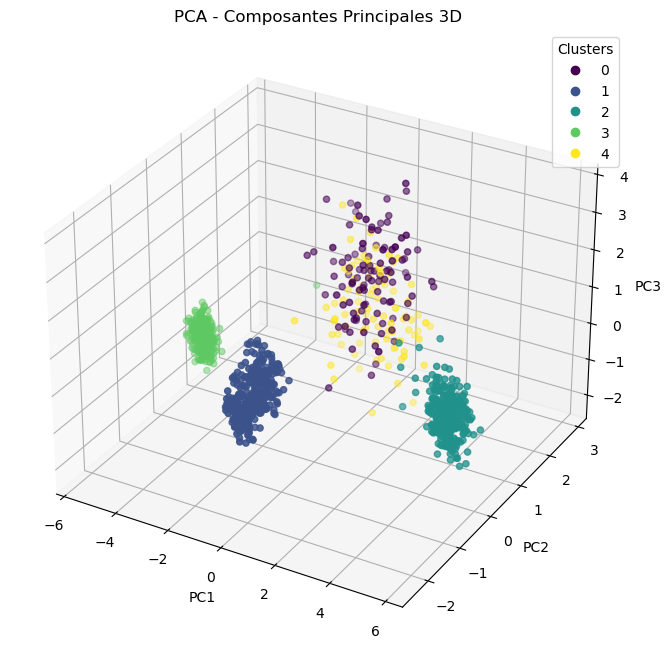

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Appliquer le PCA avec 3 composantes
pca = PCA(n_components=3)
pca_result_3d = pca.fit_transform(scaled_data)

# Créer un DataFrame avec les trois composantes principales
pca_df_3d = pd.DataFrame(data=pca_result_3d, columns=[f'PC{i+1}' for i in range(3)])
pca_df_3d['cluster'] = df_copie['cluster']

# Créer une figure 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Utiliser scatter pour le plot en 3D avec des couleurs représentant les clusters
scatter = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'], c=pca_df_3d['cluster'], cmap='viridis')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - Composantes Principales 3D')
ax.legend(*scatter.legend_elements(), title='Clusters')

plt.show()

# Appliquer le PCA avant le clustering

### Créer un nouveau DataFrame

In [16]:
df_copie2 = df.copy()

### Normaliser les données

In [17]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copie2)

### Reduire la dimension avec PCA

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pca = PCA()
pca_result = pca.fit_transform(scaled_data)

### Choisissez le nombre optimal de composantes en fonction de la variance expliquée

In [19]:
# le nombre de composantes principales
n_components = 3  

# Réduction de la dimensionnalité avec le nombre choisi de composantes principales
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)

### le Nb optimal de clusters: methode de la silhoutte 

In [20]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(pca_result)
    silhouette_avg = silhouette_score(pca_result, cluster_labels)
    silhouette_scores.append(silhouette_avg)

### Le score de la silhoutte en fonction du nb de clusters 

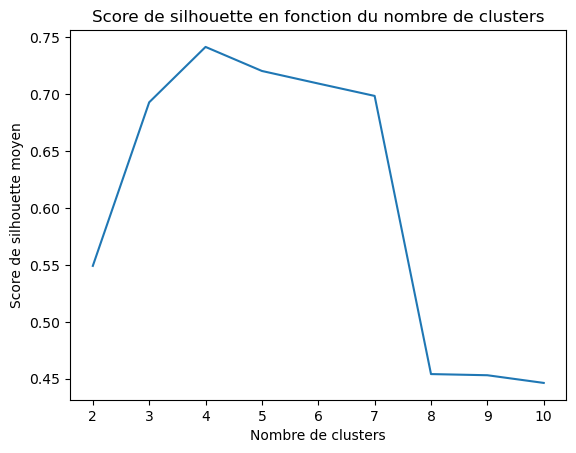

In [21]:
plt.plot(range(2, 11), silhouette_scores)
plt.title('Score de silhouette en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette moyen')
plt.show()

### Choix le nb optimal de clusters 

In [22]:
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"Nombre optimal de clusters selon le score de silhouette : {optimal_clusters}")

Nombre optimal de clusters selon le score de silhouette : 4


### Appliquation du modèle K-Means avec le nombre optimal de clusters 

In [23]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans_optimal.fit_predict(pca_result)

### Visualisation des résultats en 3D (pour 3 composantes principales)

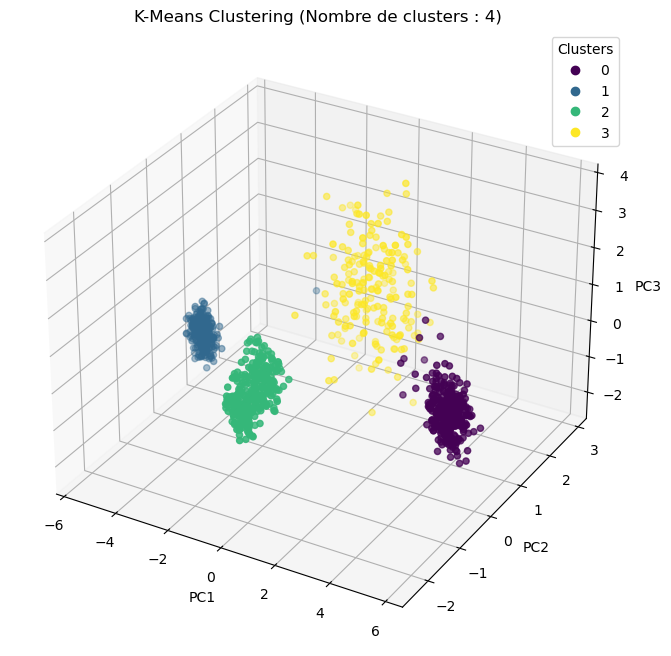

In [24]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=df['cluster'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title(f'K-Means Clustering (Nombre de clusters : {optimal_clusters})')
ax.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

Les résultats sont meilleurs si on applique le PCA avant le K-means, j obtient 4 clusters comme ça au lieu de 5 ce qui est logique. psq si on regarde le graphe avec 5 clusters ça se voit que ya 2 clusters qui sont melangés. Donc pk pas les regrouper en un seul.  

### Analyse des résultats 

In [26]:
k = 4  
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_copie2['cluster'] = kmeans.fit_predict(scaled_data)

In [27]:
cluster_summary = df_copie2.groupby('cluster').mean()
print(cluster_summary)

         anxiety_level  self_esteem  mental_health_history  depression  \
cluster                                                                  
0             4.182724    27.438538               0.000000    4.172757   
1            17.983713     7.837134               1.000000   21.358306   
2            10.244792    15.083333               0.421875   13.052083   
3            11.410000    19.980000               0.513333   11.640000   

         headache  blood_pressure  sleep_quality  breathing_problem  \
cluster                                                               
0        1.000000        2.003322       4.488372           1.514950   
1        3.934853        3.000000       1.009772           3.934853   
2        2.630208        3.000000       2.750000           2.380208   
3        2.483333        1.000000       2.456667           3.026667   

         noise_level  living_conditions  ...  basic_needs  \
cluster                                  ...                
0     